In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pylab import rcParams
from sklearn import preprocessing

import scipy
from scipy.stats.stats import pearsonr

In [2]:
%matplotlib inline
pylab.rcParams[ 'figure.figsize' ] = 5 , 4
sns.set_style('whitegrid')

In [3]:
Transit_Reviews=pd.read_csv("transitfinal_100m.csv", usecols=['Hotel_Name','transit_count','Review_Count'])
Transit_Reviews = Transit_Reviews.drop_duplicates()
Transit_Reviews.index = pd.RangeIndex(start=0, stop=len(Transit_Reviews), step=1)
Transit_Reviews.to_csv('transitfinal_100m.csv')
Transit=pd.read_csv("transitfinal_100m.csv", usecols=['Hotel_Name','transit_count','Review_Count'])



In [8]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews-2.csv",usecols=['Hotel_Name','Reviewer_Score'])
Hotel_Reviews.head()

,Hotel_Name,Reviewer_Score
0,Hotel Arena,2.9
1,Hotel Arena,7.5
2,Hotel Arena,7.1
3,Hotel Arena,3.8
4,Hotel Arena,6.7


In [9]:
Hotel_name=np.array([])
mean_reviewer_score=np.array([])

In [10]:
Hotels=Hotel_Reviews.Hotel_Name.unique()

In [11]:
for Hotel in Hotels:
    TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name']==Hotel]
    TEMP=TEMP.reset_index()
    Hotel_name=np.append(Hotel_name,Hotel)
    
    mean_reviewer_score=np.append(mean_reviewer_score, TEMP['Reviewer_Score'].mean())

In [12]:
column1=['Hotel_name','mean_reviewer_score']

In [13]:
data1=np.column_stack((Hotel_name, mean_reviewer_score))

In [14]:
HotelReviews=pd.DataFrame(data1, columns=column1)
HotelReviews['mean_reviewer_score']=pd.to_numeric(HotelReviews['mean_reviewer_score'])
HotelReviews=HotelReviews[['mean_reviewer_score']]
HotelReviews.head()

,mean_reviewer_score
0,7.836296
1,8.602827
2,9.298843
3,7.711469
4,8.848571


In [15]:
Connections=pd.concat([Transit_Reviews, HotelReviews], ignore_index=False, axis=1)
Connect = Connections[Connections.transit_count!='-']

Connect['transit_count']=Connect['transit_count'].astype(str).astype(int)
Connect

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Hotel_Name,transit_count,Review_Count,mean_reviewer_score
0,Hotel Arena,0,405.0,7.836296
1,K K Hotel George,1,566.0,8.602827
2,Apex Temple Court Hotel,2,1037.0,9.298843
3,The Park Grand London Paddington,0,1770.0,7.711469
4,Monhotel Lounge SPA,0,35.0,8.848571
5,Kube Hotel Ice Bar,2,19.0,5.852632
6,The Principal London,2,1425.0,8.029333
7,Park Plaza County Hall London,2,2223.0,8.369546
8,One Aldwych,3,136.0,9.144853
9,Splendid Etoile,8,127.0,9.142520


In [16]:
TransitGroups=Connect.transit_count.unique()

In [17]:
TransitGroups.size

17

In [18]:
Connect['transit_count'].value_counts().sort_values(ascending=False)

0     562
1     341
2     185
3     157
4     101
5      47
6      28
8      20
7      18
10      6
9       4
14      2
17      2
16      1
18      1
13      1
19      1
Name: transit_count, dtype: int64

In [28]:
bins = [-1, 0, 2, 4, 6, 8, 20]
groups=Connect.groupby(['transit_count',pd.cut(Connect.transit_count, bins)])
Transits = groups.size().unstack().sum()
Transits

transit_count
(-1, 0]    562.0
(0, 2]     526.0
(2, 4]     258.0
(4, 6]      75.0
(6, 8]      38.0
(8, 20]     18.0
dtype: float64

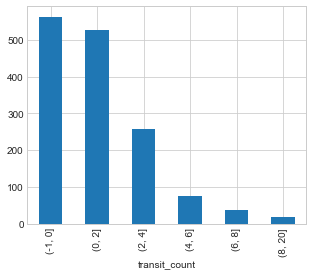

In [29]:
Transits.plot('bar')
plt.show()

In [32]:
Con1 = Connect[Connect.transit_count==0].mean_reviewer_score.mean()
Con1

8.492160449427232

In [23]:
Con2 = Connect[(Connect['transit_count']>0) & (Connect['transit_count']<5)].mean_reviewer_score.mean()
Con2

8.451592721307414

In [24]:
Con3 = Connect[(Connect['transit_count']>4) & (Connect['transit_count']<7)].mean_reviewer_score.mean()
Con3

8.322563808278558

In [25]:
Con4 = Connect[(Connect['transit_count']>6) & (Connect['transit_count']<9)].mean_reviewer_score.mean()
Con4

8.64493288907558

In [26]:
Con5 = Connect[(Connect['transit_count']>8) & (Connect['transit_count']<11)].mean_reviewer_score.mean()
Con5

8.928118227884898

In [27]:
Con6 = Connect[(Connect['transit_count']>10) & (Connect['transit_count']<13)].mean_reviewer_score.mean()
Con6

nan

In [37]:
Con7 = Connect[(Connect['transit_count']>12) & (Connect['transit_count']<15)].mean_reviewer_score.mean()
Con7

8.125826376666158

In [38]:
Con8 = Connect[(Connect['transit_count']>14) & (Connect['transit_count']<17)].mean_reviewer_score.mean()
Con8

8.271559633027525

In [39]:
Con9 = Connect[(Connect['transit_count']>16) & (Connect['transit_count']<19)].mean_reviewer_score.mean()
Con9

8.578075048732941

In [40]:
Con10 = Connect[(Connect['transit_count']>18) & (Connect['transit_count']<21)].mean_reviewer_score.mean()
Con10

8.642391304347827

In [39]:
Hotel_City_Reviews=pd.read_csv("Hotel_Info_Country_City.csv", usecols=['Hotel_Name','City'])

In [43]:
Amsterdam=Hotel_City_Reviews.loc[Hotel_City_Reviews['City']=='Amsterdam']
len(Amsterdam.Hotel_Name.unique())

105

In [42]:
Hotel_Amsterdam = hotels_zero_transit[hotels_zero_transit['Hotel_Name'].isin(Amsterdam.Hotel_Name.unique())]
Hotel_Amsterdam

,Hotel_Name
0,Hotel Arena
382,Morgan Mees
788,Sir Albert Hotel
790,Corendon Vitality Hotel Amsterdam
797,Hampshire Hotel Rembrandt Square Amsterdam
799,Pillows Anna van den Vondel Amsterdam
802,Best Western Delphi Hotel
803,Apollofirst Boutique Hotel
804,Hilton Amsterdam
805,Apollo Hotel Amsterdam


In [45]:
hotels_zero_transit=pd.DataFrame(Connect[Connect.transit_count==0].Hotel_Name)


In [44]:
import langid
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LiverJoker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
Hotel_Reviews=pd.read_csv("Hotel_Reviews-2.csv")
TEMP=Hotel_Reviews.loc[Hotel_Reviews['Hotel_Name'].isin(Hotel_Amsterdam.Hotel_Name.unique())]
len(TEMP)

30802

In [49]:
corpusP= []
corpusN= []
uniqueUsefulTokens= set()

for i in TEMP.index:
       reviewP=""
       reviewN="" 
       if ("No Negative" in TEMP['Negative_Review'][i]) and "No Positive" in TEMP['Positive_Review'][i]:
            continue
       elif "No Negative" in TEMP['Negative_Review'][i]:
            reviewP = TEMP['Positive_Review'][i]
       else:
            reviewN = TEMP['Negative_Review'][i]
       
       if (langid.classify(reviewP)[0]!='en' and langid.classify(reviewN)[0]!='en'):
            continue
       reviewP= re.sub('[^a-zA-Z]', ' ', reviewP)
       reviewN= re.sub('[^a-zA-Z]', ' ', reviewN)

       reviewP=reviewP.lower().split()
       reviewN=reviewN.lower().split()

       ps=PorterStemmer()
       reviewP  = [ps.stem(word) for word in reviewP if not word in set(stopwords.words('english'))]
       reviewN  = [ps.stem(word) for word in reviewN if not word in set(stopwords.words('english'))]
       for word in reviewP:
            uniqueUsefulTokens.add(word)
       reviewP = ' '.join(reviewP)
    
       for word in reviewN:
            uniqueUsefulTokens.add(word)
       reviewN = ' '.join(reviewN)
    
       if reviewP!="":
            corpusP.append(reviewP)
        
    
       if reviewN!="":
            corpusN.append(reviewN)
            

In [58]:
len(corpusN)

22818

In [59]:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

def computeIDF(docList):
    import math
    ifdDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word, val in doc.items():
            if val>0:
                idfDict[word] +=1
            
    for word, val in idfDict.items():
        idfDict[word] = math.log(N/float(val))
        
    return idfDict

def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [60]:
from functools import reduce

In [61]:
bowA = []
for line in corpusN:
    line= re.sub('[^a-zA-Z]', ' ', line)
    bowA.append(line.split(" "))

bowAnew = reduce(lambda x,y: x+y,bowA)
len(bowA)

22818

In [63]:
wordSet=set(bowAnew)
wordSet

{'lotti',
 'quotat',
 'deco',
 'adn',
 'want',
 'grasp',
 'gaug',
 'princess',
 'press',
 'norwegian',
 'get',
 'decis',
 'quit',
 'startibg',
 'overrul',
 'bedlight',
 'prefer',
 'vondelpark',
 'incorpor',
 'legend',
 'withut',
 'thicj',
 'sitfl',
 'modernist',
 'atmopsher',
 'chicken',
 'roadsid',
 'staition',
 'grandchildren',
 'vinegar',
 'pedant',
 'moss',
 'coridoor',
 'squishi',
 'child',
 'aussi',
 'attutid',
 'dissapoint',
 'pranch',
 'moon',
 'crawl',
 'newli',
 'anyhow',
 'duvet',
 'demolit',
 'cudnt',
 'oder',
 'end',
 'scheme',
 'damsquar',
 'cleanki',
 'forget',
 'steel',
 'facil',
 'uncount',
 'preadjust',
 'score',
 'inbetween',
 'blatantli',
 'extral',
 'intern',
 'margarita',
 'tumbl',
 'oferta',
 'wine',
 'gear',
 'carol',
 'masculin',
 'wd',
 'gloriou',
 'feed',
 'pilow',
 'minibar',
 'tripadvisor',
 'videoconferenc',
 'posibl',
 'chang',
 'unsaf',
 'grayish',
 'assum',
 'distinguish',
 'global',
 'tear',
 'ined',
 'fitt',
 'cs',
 'inch',
 'appl',
 'downright',
 'ca

In [64]:
wordDictAarr = np.array([])
for listbowA in bowA:
    wordDictA = dict.fromkeys(wordSet,0)
    for word in listbowA:
        wordDictA[word]+=1
    wordDictAarr = np.append(wordDictAarr, wordDictA)

In [65]:
i = 0
tfBowAarr = np.array([])
for listbowA in bowA:
    tfBowA = computeTF(wordDictAarr[i], listbowA)
    i +=1
    tfBowAarr = np.append(tfBowAarr, tfBowA)
tfBowAarr

array([ {'lotti': 0.0, 'quotat': 0.0, 'deco': 0.0, 'adn': 0.0, 'want': 0.011695906432748537, 'grasp': 0.0, 'gaug': 0.0, 'princess': 0.0, 'press': 0.0, 'norwegian': 0.0, 'get': 0.005847953216374269, 'decis': 0.0, 'quit': 0.0, 'startibg': 0.0, 'overrul': 0.0, 'bedlight': 0.0, 'prefer': 0.0, 'vondelpark': 0.0, 'incorpor': 0.0, 'legend': 0.0, 'withut': 0.0, 'thicj': 0.0, 'sitfl': 0.0, 'modernist': 0.0, 'atmopsher': 0.0, 'chicken': 0.0, 'roadsid': 0.0, 'staition': 0.0, 'grandchildren': 0.0, 'vinegar': 0.0, 'pedant': 0.0, 'moss': 0.0, 'coridoor': 0.0, 'squishi': 0.0, 'child': 0.0, 'aussi': 0.0, 'attutid': 0.0, 'dissapoint': 0.0, 'pranch': 0.0, 'moon': 0.0, 'crawl': 0.0, 'newli': 0.0, 'anyhow': 0.0, 'duvet': 0.0, 'demolit': 0.0, 'cudnt': 0.0, 'oder': 0.0, 'end': 0.0, 'scheme': 0.0, 'damsquar': 0.0, 'cleanki': 0.0, 'forget': 0.0, 'steel': 0.0, 'facil': 0.0, 'uncount': 0.0, 'preadjust': 0.0, 'score': 0.0, 'inbetween': 0.0, 'blatantli': 0.0, 'extral': 0.0, 'intern': 0.005847953216374269, 'margar

In [66]:
idfs = computeIDF(wordDictAarr)
idfsData = pd.DataFrame.from_dict(idfs, orient='index', dtype=float)
idfsData[0]=1/idfsData[0]

PosRev = pd.DataFrame(idfsData[0].sort_values(ascending=False))
PositiveReviews = PosRev.iloc[0:10, :]
PositiveReviews

,0
room,0.883260
hotel,0.592434
breakfast,0.465447
noth,0.436624
staff,0.409850
bit,0.401791
would,0.390457
small,0.385769
bed,0.384199
could,0.382887
